In [6]:
import os
import uproot
import vector
import particle 

import awkward as ak
import matplotlib.pylab as plt
import numpy as np

from hepunits.units import GeV

vector.register_awkward()

Let's look at this dataset:
[MuOnia](https://opendata.cern.ch/record/30560)


See here to learn what variables are in the event and what they mean:
[dataset semantics](https://opendata.cern.ch/eos/opendata/cms/dataset-semantics/NanoAOD/30560/MuOnia_doc.html)

In [2]:
datafile_name = '0AB09F5D-121F-9443-87C8-3B69FAF1D99E.root'

if not (os.path.isfile(datafile_name)): 
    ! curl -O http://opendata.cern.ch//eos/opendata/cms/Run2016H/MuOnia/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/100000/0AB09F5D-121F-9443-87C8-3B69FAF1D99E.root
    

We'll use [uproot](https://github.com/scikit-hep/uproot5) for I/O 

In [3]:
infile = uproot.open(datafile_name)

In [4]:
events = infile['Events']
#events.show()

Let's read the data into [awkward](https://github.com/scikit-hep/awkward) arrays, filtering on muon-related variables:

In [5]:
df = events.arrays(filter_name='/(run|event|luminosityBlock|Muon_|nMuon)/', library='ak') 

Let's plot a few variables:

Text(0.5, 0, 'muon eta')

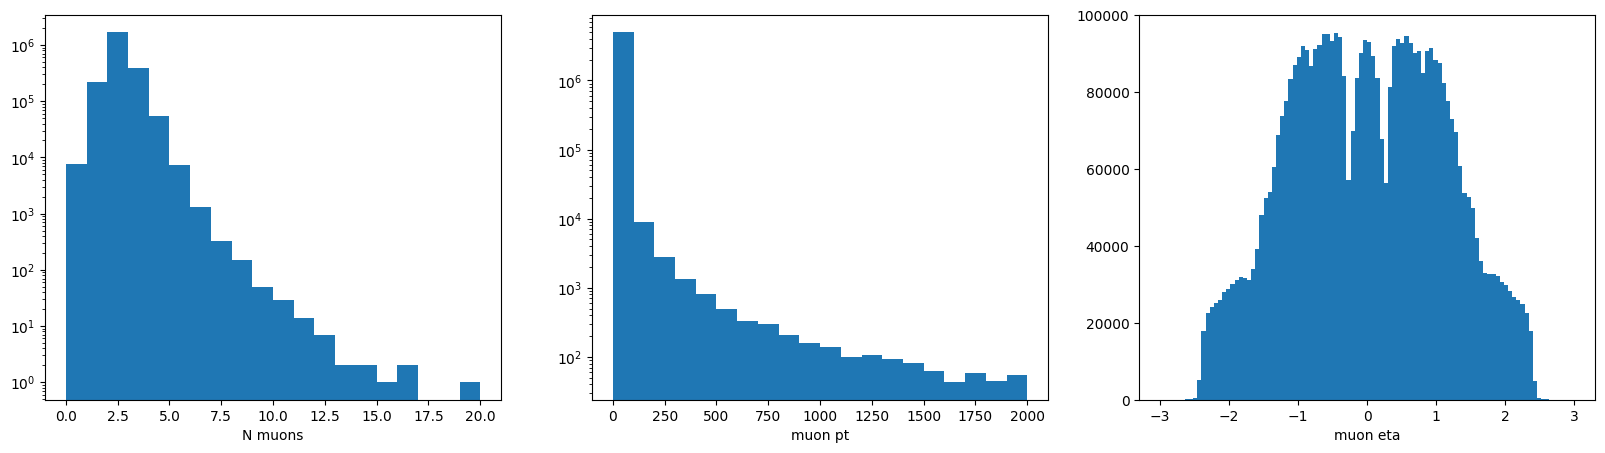

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

axes[0].hist(df['nMuon'], bins=20, range=(0,20))
axes[0].set_xlabel('N muons')
axes[0].set_yscale('log')

axes[1].hist(ak.flatten(df['Muon_pt']), bins=20, range=(0,2000))
axes[1].set_xlabel('muon pt')
axes[1].set_yscale('log')

axes[2].hist(ak.flatten(df['Muon_eta']), bins=100, range=(-3,3))
axes[2].set_xlabel('muon eta')

Next we'll collect some of the muon information into an object (note that "Momentum4D" comes from [vector](https://vector.readthedocs.io/en/latest/))

In [8]:
muons = ak.zip({
    'pt': df.Muon_pt,
    'phi': df.Muon_phi,
    'eta': df.Muon_eta,
    'mass': df.Muon_mass,
    'charge': df.Muon_charge,
}, with_name='Momentum4D')

Make some selection masks for precisely 2 muons of opposite charge:

In [9]:
select_2mu = (ak.num(muons) == 2)
two_mu = muons[select_2mu]

select_oppcharge = two_mu[:,0].charge*two_mu[:,1].charge == -1
two_mu = two_mu[select_oppcharge]

Calculate the invariant mass and plot

In [10]:
M = (two_mu[:, 0] + two_mu[:, 1]).mass

Text(0.5, 0, 'invariant mass [GeV]')

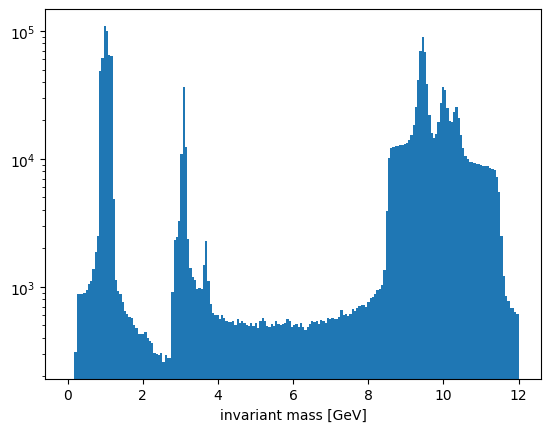

In [11]:
plt.hist(M, bins=200, range=(0,12))
plt.yscale('log')
plt.xlabel('invariant mass [GeV]')

For reference, see the invariant mass plot [here](https://twiki.cern.ch/twiki/pub/CMSPublic/PhysicsResultsBPH/dimuons_13tev_2016_0p9ifb.pdf)

Let's look at the MC sample [B0ToJpsiK0sPiPi](https://opendata.cern.ch/record/32695) where the dataset contents are [here](https://opendata.cern.ch/eos/opendata/cms/dataset-semantics/NanoAODSIM/32695/B0ToJpsiK0sPiPi_JMM_Filter_DGamma0_TuneCP5_13TeV-pythia8-evtgen_doc.html)

$B_{0} \rightarrow J/\Psi~K_{s}^{0}$

$J/\Psi \rightarrow \mu^{+}\mu^{-}$, $K_{s}^{0} \rightarrow \pi^{+}\pi^{-}$

In [12]:
datafile_name = '62A5FF7F-E5FD-7148-97C8-C51B9C7FF7B5.root'

if not (os.path.isfile(datafile_name)): 
    ! curl -O http://opendata.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/B0ToJpsiK0sPiPi_JMM_Filter_DGamma0_TuneCP5_13TeV-pythia8-evtgen/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/60000/62A5FF7F-E5FD-7148-97C8-C51B9C7FF7B5.root

In [13]:
infile = uproot.open(datafile_name)

In [14]:
events = infile['Events']

In [15]:
df = events.arrays(filter_name='/(run|event|luminosityBlock|Muon_|nMuon|IsoTrack_|nIsoTrack)/', library='ak') 

Text(0.5, 0, 'muon eta')

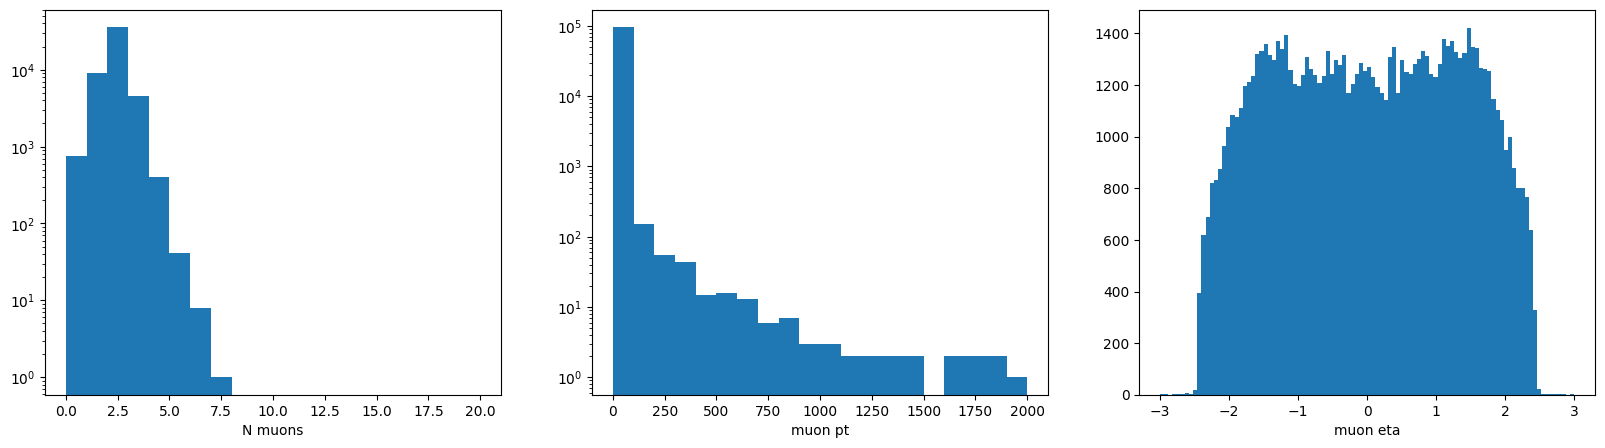

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

axes[0].hist(df['nMuon'], bins=20, range=(0,20))
axes[0].set_xlabel('N muons')
axes[0].set_yscale('log')

axes[1].hist(ak.flatten(df['Muon_pt']), bins=20, range=(0,2000))
axes[1].set_xlabel('muon pt')
axes[1].set_yscale('log')

axes[2].hist(ak.flatten(df['Muon_eta']), bins=100, range=(-3,3))
axes[2].set_xlabel('muon eta')

In [17]:
muons = ak.zip({
    'pt': df.Muon_pt,
    'phi': df.Muon_phi,
    'eta': df.Muon_eta,
    'mass': df.Muon_mass,
    'charge': df.Muon_charge,
}, with_name='Momentum4D')

In [18]:
select_2mu = (ak.num(muons) == 2)
two_mu = muons[select_2mu]

select_oppcharge = two_mu[:,0].charge*two_mu[:,1].charge == -1
two_mu = two_mu[select_oppcharge]

In [19]:
M = (two_mu[:, 0] + two_mu[:, 1]).mass

Text(0.5, 0, 'invariant mass [GeV]')

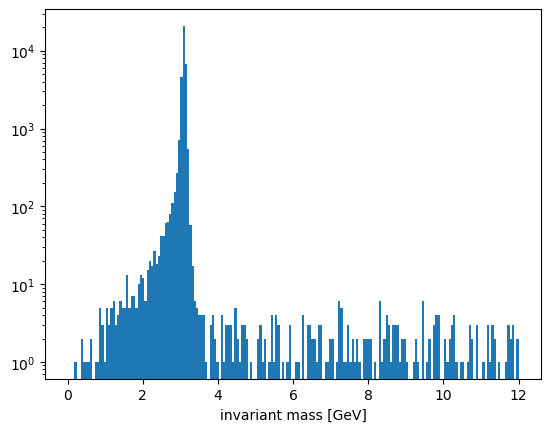

In [20]:
plt.hist(M, bins=200, range=(0,12))
plt.yscale('log')
plt.xlabel('invariant mass [GeV]')

In [21]:
df['IsoTrack_pdgId']

<Array [[], [], [], ..., [], [211, 211, 211, -211]] type='50400 * var * int32'>

Recall that the PDG code for $\pi^{+}$ is 211

In [22]:
select_2track = df['nIsoTrack'] == 2
two_tracks = df[select_2track]

In [23]:
both_pions = np.all(np.abs(two_tracks['IsoTrack_pdgId']) == 211, axis=1)
two_pions = two_tracks[both_pions]

In [24]:
select_oppcharge = np.prod(two_pions['IsoTrack_charge'], axis=1) == -1 
select_oppcharge
two_pions = two_pions[select_oppcharge]

In [25]:
two_pions['IsoTrack_pdgId']

<Array [[-211, 211], [211, ...], ..., [211, -211]] type='1633 * var * int32'>

In [33]:
charged_pion = particle.Particle.from_pdgid(211)
charged_pion

<Particle: name="pi+", pdgid=211, mass=139.57039 ± 0.00018 MeV>